# Austrilia Weather Prediction

## 1. Data pre-treatment

In [218]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [219]:
weather_data = pd.read_csv('weatherAUS.csv')

In [220]:
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


### 1.2 Feature Processing
#### 1.2.1 String-to-number Encoding:
##### RainToday & RainTomorrow

In [221]:
# replace the target values with 0 and 1.
mapping = {'Yes': 1, 'No': 0}
weather_data = weather_data.replace({'RainTomorrow': mapping,'RainToday':mapping})
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.4,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,0


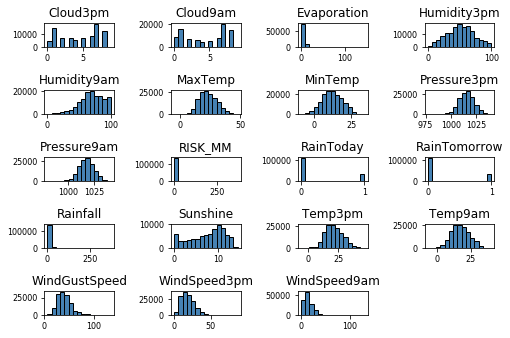

In [222]:
# distribution of each feature
weather_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

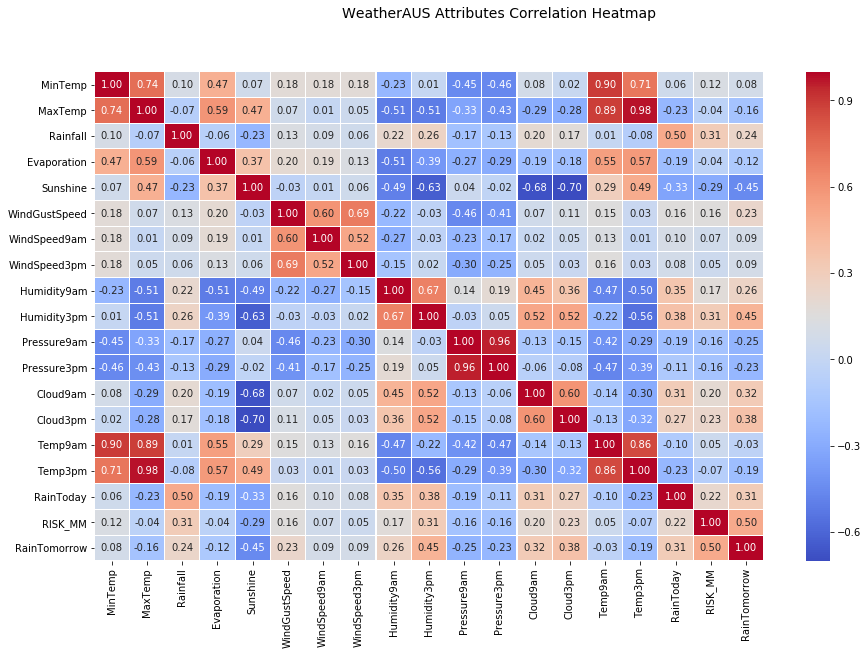

In [223]:
# compute the correlation coefficients matris

f, ax = plt.subplots(figsize=(15, 9))
corr = weather_data.corr()
red_hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
#f.subplots_adjust(top=0.93)
t= f.suptitle('WeatherAUS Attributes Correlation Heatmap', fontsize=14)

In [224]:
# handling feature 'Date', convert string of date to 3 numbers: year, month and date.
def split_Date(df):
    #Wildcard:
    #?:-0 or 1; +: 1 or more; *:0 or more.
    df['Year'] = df['Date'].str.extract(r'(\d\d\d\d)-') 
    df['Month'] = df['Date'].str.extract(r'-(\d\d)-')
    df['Day'] = df['Date'].str.extract(r'-\d\d-(\d\d)')
    df.drop('Date', axis=1, inplace=True)
    print('Dates splitted.')
    return df

In [226]:
weather_df = split_Date(weather_data)

Dates splitted.


#### 1.2.2 One-Hot Encoding
##### Location & WindDir

In [227]:
# handling feature 'Location'. One-hot encoding
def process_Location(df):
    
    # encoding in dummy variable
    loc_dummies = pd.get_dummies(df['Location'], prefix='Loc')
    df = pd.concat([df, loc_dummies], axis=1)
    
    # removing the original variable
    df.drop('Location', axis=1, inplace=True)
    
    print("Location processing finished.")
    return df

In [228]:
# handling features related to Wind Directions. One-hot encoding.
def process_WindDir(df):
    
    # encoding in dummy variable
    WD9_dummies = pd.get_dummies(df['WindDir9am'], prefix='WD9')
    df = pd.concat([df, WD9_dummies], axis=1)
    
    # encoding in dummy variable
    WD3_dummies = pd.get_dummies(df['WindDir3pm'], prefix='WD3')
    df = pd.concat([df, WD3_dummies], axis=1)
    
    # encoding in dummy variable
    WGD_dummies = pd.get_dummies(df['WindGustDir'], prefix='WGD')
    df = pd.concat([df, WGD_dummies], axis=1)
    
    # removing the original variable
    df.drop('WindGustDir', axis=1, inplace=True)
    df.drop('WindDir9am', axis=1, inplace=True)
    df.drop('WindDir3pm', axis=1, inplace=True)
    
    print("WindDir processing finished.")
    return df

In [229]:
weather_df = process_Location(weather_df)
weather_df = process_WindDir(weather_df)

Location processing finished.
WindDir processing finished.


### 1.3 Missing Values

In [230]:
#count the nan values in each feature
weather_df.isnull().sum()

MinTemp                637
MaxTemp                322
Rainfall              1406
Evaporation          60843
Sunshine             67816
WindGustSpeed         9270
WindSpeed9am          1348
WindSpeed3pm          2630
Humidity9am           1774
Humidity3pm           3610
Pressure9am          14014
Pressure3pm          13981
Cloud9am             53657
Cloud3pm             57094
Temp9am                904
Temp3pm               2726
RainToday             1406
RISK_MM                  0
RainTomorrow             0
Year                     0
Month                    0
Day                      0
Loc_Adelaide             0
Loc_Albany               0
Loc_Albury               0
Loc_AliceSprings         0
Loc_BadgerysCreek        0
Loc_Ballarat             0
Loc_Bendigo              0
Loc_Brisbane             0
                     ...  
WD3_ESE                  0
WD3_N                    0
WD3_NE                   0
WD3_NNE                  0
WD3_NNW                  0
WD3_NW                   0
W

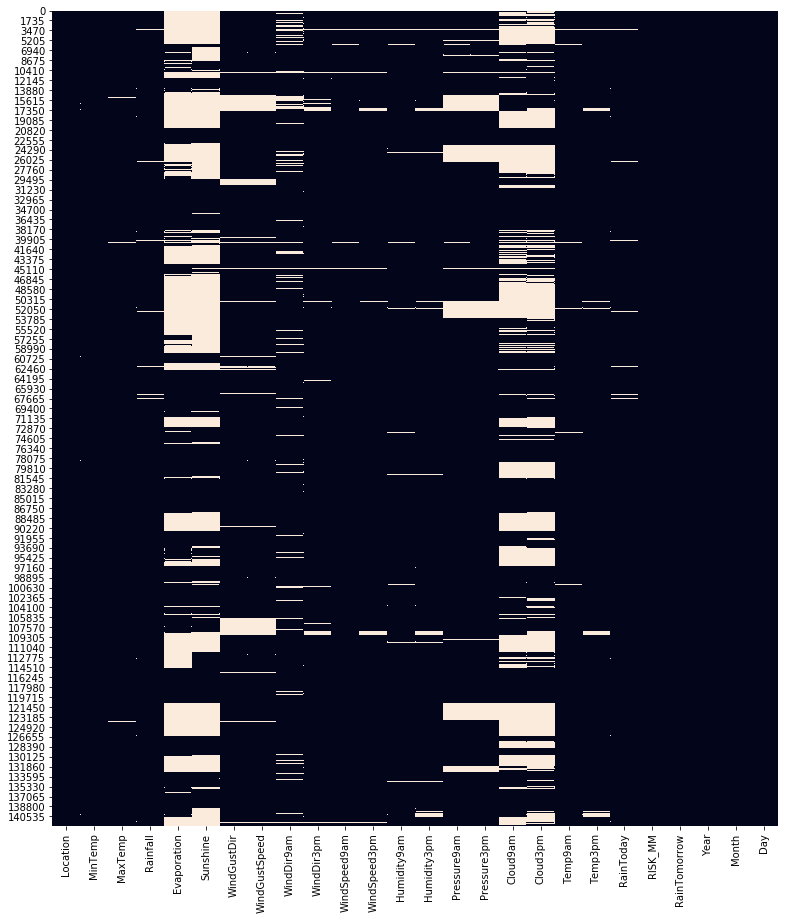

In [231]:
#visualize missing value
plt.figure(figsize = (13,15))
ax = sns.heatmap(weather_data.isnull(), cbar=False)

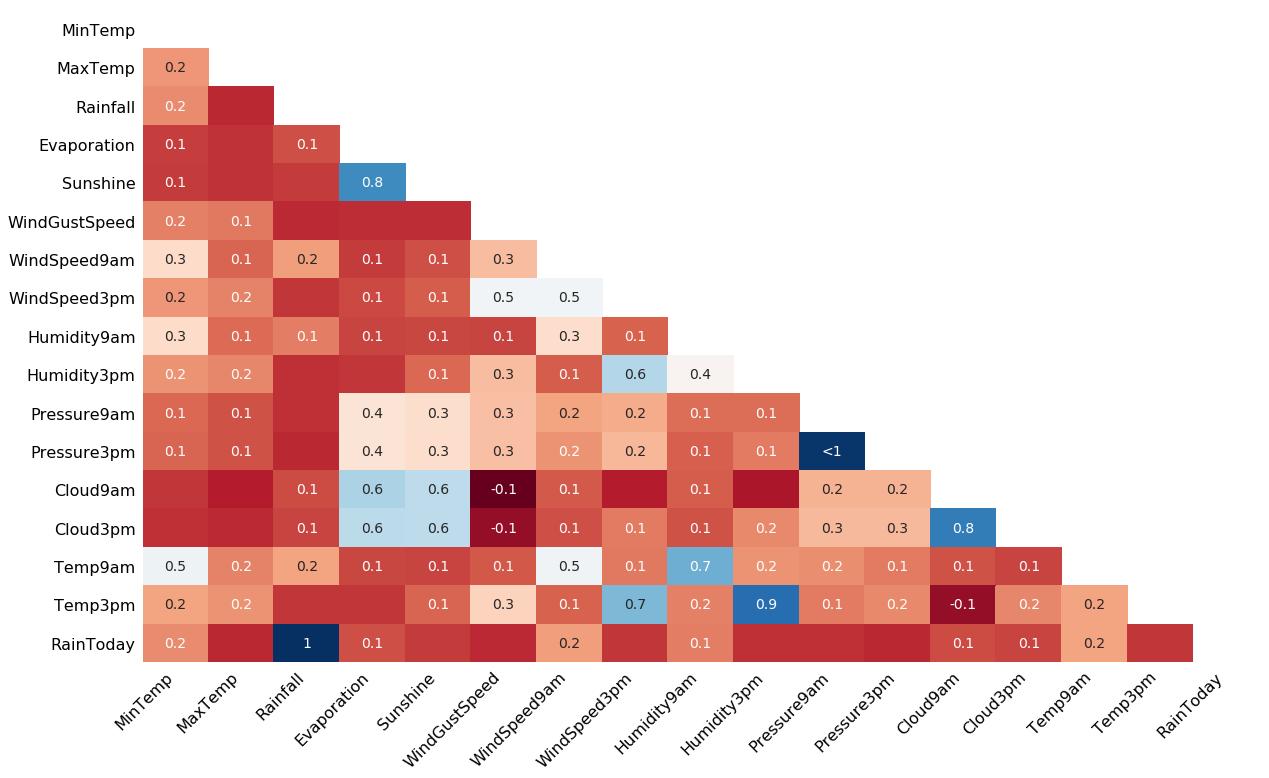

In [232]:
#missingno: an model for missing value handling
#The missingno correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another

#To install missingno: pip install missingno
import missingno as msno
msno.heatmap(weather_df)

In [233]:
#count how many rows have no less than t not-null values.
def count_not_nans(df, t):
    threshold = t
    counts = 0
    notnan_counts = []
    for index, row in df.iterrows():
        count_notnan = row[:].notnull().sum()
        if count_notnan >= threshold:
            counts+=1
            notnan_counts.append(count_notnan)
    #print(counts) 
    #print(nan_counts)
    return counts

In [234]:
#count how many rows have no less than t nan values.
def count_nans(df, t):
    threshold = t
    counts = 0
    nan_counts = []
    for index, row in df.iterrows():
        count_nan = row[:].isnull().sum()
        if count_nan >= threshold:
            counts+=1
            nan_counts.append(count_nan)
    #print(counts) 
    #print(nan_counts) 
    return counts

#### 1.3.1 Extract not-NaN subset

In [235]:
def extract_notnan(df):
    indexer = []
    for index, row in df.iterrows():
        if row[:].notnull().sum() == len(df.columns):
            indexer.append(index)
    subset = df.loc[indexer,:]
    return subset, indexer
# subset of function is equivalent to .dropna()

In [236]:
#count_nans(weather_df, 9)

1775

In [241]:
weather_pro, index_pro = extract_notnan(weather_df)

In [242]:
weather_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58090 entries, 5939 to 139112
Columns: 119 entries, MinTemp to WGD_WSW
dtypes: float64(18), int64(1), object(3), uint8(97)
memory usage: 15.6+ MB


In [243]:
weather_pro_X = weather_pro.drop(columns = ['RainTomorrow'])

#### 1.3.2 Replacing NaN values

##### a. With -9999

In [244]:
weather_9999 = weather_df.fillna(-9999)

In [245]:
weather_9999.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WGD_NNW,WGD_NW,WGD_S,WGD_SE,WGD_SSE,WGD_SSW,WGD_SW,WGD_W,WGD_WNW,WGD_WSW
0,13.4,22.9,0.6,-9999.0,-9999.0,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,-9999.0,-9999.0,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,-9999.0,-9999.0,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,-9999.0,-9999.0,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,-9999.0,-9999.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,1,0,0


##### b. By K-means clustering

In [246]:
weather_df.isnull().sum()

MinTemp                637
MaxTemp                322
Rainfall              1406
Evaporation          60843
Sunshine             67816
WindGustSpeed         9270
WindSpeed9am          1348
WindSpeed3pm          2630
Humidity9am           1774
Humidity3pm           3610
Pressure9am          14014
Pressure3pm          13981
Cloud9am             53657
Cloud3pm             57094
Temp9am                904
Temp3pm               2726
RainToday             1406
RISK_MM                  0
RainTomorrow             0
Year                     0
Month                    0
Day                      0
Loc_Adelaide             0
Loc_Albany               0
Loc_Albury               0
Loc_AliceSprings         0
Loc_BadgerysCreek        0
Loc_Ballarat             0
Loc_Bendigo              0
Loc_Brisbane             0
                     ...  
WD3_ESE                  0
WD3_N                    0
WD3_NE                   0
WD3_NNE                  0
WD3_NNW                  0
WD3_NW                   0
W

In [247]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.223423,2.360682,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.416541,8.477969,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.800000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000


## 2. Model Fitting

In [248]:
# function for data scaling
def data_scaler(df):
    scaler=preprocessing.StandardScaler().fit(df) 
    df_scaled=scaler.transform(df)
    print("Features scaled.")
    return df_scaled

### 2.1 RandomForest 

##### Fitting not-nan subset

In [249]:
print(weather_pro.RainTomorrow.count())
print(weather_pro.RainTomorrow.sum())
print(weather_pro.RainTomorrow.sum()/weather_pro.RainTomorrow.count())

58090
12729
0.21912549492167327


In [250]:
#split the dataset into THREE parts: training set, validation set, test set.
from sklearn.model_selection import train_test_split
X_trainval, X_test, Y_trainval, Y_test = train_test_split(weather_pro_X, weather_pro.RainTomorrow, random_state= 0)


In [251]:
X_trainval = data_scaler(X_trainval)
X_test = data_scaler(X_test)

Features scaled.
Features scaled.


In [252]:
# para_name: the parameter that is about to be optimized
# para_list: range of the parameter
# para_init_vals: initial values of parameters
# paras{} stores the key:value pairs of parameters and default values.

def find_best_params(X, Y, para_name, para_list, para_init_vals):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=0)
    
    v1 = para_init_vals[0]
    v2 = para_init_vals[1]
    v3 = para_init_vals[2]
    paras = {'max_features': v1, 'max_depth': v2, 'random_state': v3}
    
    best_score = 0
    best_precision = 0
    best_recall = 0
    kfolds = 5
    
    for v in para_list:
        paras[para_name] = v
        ForestModel = RandomForestClassifier(**paras)
        FittedForestModel = ForestModel.fit(X_train, Y_train)
        # cross-validation:
        scores = cross_val_score(ForestModel, X_train, Y_train, cv=kfolds)
        score = np.mean(scores)
        print(f"{para_name} = {v}")
        print(f"Score: {score}")

        predicted_labels = FittedForestModel.predict(X_valid)
        tn, fp, fn, tp = confusion_matrix(Y_valid, predicted_labels).ravel()
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        print(f"Precision: {precision}")
        print(f"Recall: {recall}\n")
        
        if score > best_score:
            best_score = score
            best_v = v
            best_precision = precision
            best_recall = recall
        elif score == best_score:
            if precision > best_precision:
                best_precision = precision
                best_v = v
                best_recall = recall
            elif precision == best_precision:
                if recall > best_recall:
                    best_recall = recall
                    best_v = v

    print(f"Best {para_name}: {best_v}")
    print(f"Corresponding score: {best_score}")
    print(f"Corresponding precision: {best_precision}")
    print(f"Corresponding recall: {best_recall}")

In [253]:
max_feature_list = [10, 20, 30, 50, 80, 118]
para_init_vals = [10, 6, 0]

find_best_params(X_trainval, Y_trainval, 'max_features', max_feature_list, para_init_vals)

max_features = 10
Score: 0.9634563197705122
Precision: 0.9986443741527339
Recall: 0.9436379163108455

max_features = 20
Score: 0.9955313773654098
Precision: 1.0
Recall: 0.9859094790777113

max_features = 30
Score: 1.0
Precision: 1.0
Recall: 1.0

max_features = 50
Score: 1.0
Precision: 1.0
Recall: 1.0

max_features = 80
Score: 1.0
Precision: 1.0
Recall: 1.0

max_features = 118
Score: 1.0
Precision: 1.0
Recall: 1.0

Best max_features: 30
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [254]:
para_init_vals = [80, 6, 0]
max_depth = [2, 4, 6, 10]

find_best_params(X_trainval, Y_trainval, 'max_depth', max_depth_list, para_init_vals)

max_depth = 2
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 3
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 4
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 6
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 10
Score: 1.0
Precision: 1.0
Recall: 1.0

Best max_depth: 2
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [255]:
random_state_list = [0, 50, 100, 500, 1000]
para_init_vals = [80, 4, 0]
find_best_params(X_trainval, Y_trainval, 'random_state', random_state_list, para_init_vals)

random_state = 0
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 50
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 100
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 500
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 1000
Score: 1.0
Precision: 1.0
Recall: 1.0

Best random_state: 0
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [256]:
para_init_vals = [80, 4, 100]

In [257]:
v1 = para_init_vals[0]
v2 = para_init_vals[1]
v3 = para_init_vals[2]
paras = {'max_features': v1, 'max_depth': v2, 'random_state': v3}

Best_ForestModel= RandomForestClassifier(**paras)
FittedForestModel = Best_ForestModel.fit(X_trainval, Y_trainval)
RF_accuracy = FittedForestModel.score(X_test, Y_test)
print(f"Accuracy: {RF_accuracy}")

predicted_labels = FittedForestModel.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, predicted_labels).ravel()
print(f"Precision: {tp/(tp+fp)}")
print(f"Recall: {tp/(tp+fn)}\n")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0



##### Fitting -9999 subset

In [258]:
print(weather_9999.RainTomorrow.count())
print(weather_9999.RainTomorrow.sum())
print(weather_9999.RainTomorrow.sum()/weather_9999.RainTomorrow.count())

142193
31877
0.22418121848473554


In [259]:
weather_9999_X = weather_9999.drop(columns = ['RainTomorrow'])

In [260]:
#split the dataset into THREE parts: training set, validation set, test set.
X_trainval_9999, X_test_9999, Y_trainval_9999, Y_test_9999 = train_test_split(weather_9999_X, weather_9999.RainTomorrow, random_state= 0)


In [261]:
max_feature_list = [10, 20, 30, 50, 70, 100, 118]
para_init_vals = [10, 6, 0]

find_best_params(X_trainval_9999, Y_trainval_9999, 'max_features', max_feature_list, para_init_vals)

max_features = 10
Score: 0.9911356355373148
Precision: 0.9973011874775098
Recall: 0.9306581598388179

max_features = 20
Score: 0.9987622476038464
Precision: 1.0
Recall: 0.9946272666218939

max_features = 30
Score: 0.9999249859348629
Precision: 1.0
Recall: 0.9996642041638684

max_features = 50
Score: 0.9999749953116209
Precision: 1.0
Recall: 1.0

max_features = 70
Score: 0.9999749953116209
Precision: 1.0
Recall: 1.0

max_features = 100
Score: 0.9999874976558104
Precision: 1.0
Recall: 1.0

max_features = 118
Score: 1.0
Precision: 1.0
Recall: 1.0

Best max_features: 118
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [262]:
para_init_vals = [118, 6, 0]
max_depth_list = [2, 3, 4, 6, 10]

find_best_params(X_trainval, Y_trainval, 'max_depth', max_depth_list, para_init_vals)

max_depth = 2
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 3
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 4
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 6
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 10
Score: 1.0
Precision: 1.0
Recall: 1.0

Best max_depth: 2
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [266]:
random_state_list = [0, 50, 100, 500, 1000]
para_init_vals = [118, 2, 0]
find_best_params(X_trainval, Y_trainval, 'random_state', random_state_list, para_init_vals)

random_state = 0
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 50
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 100
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 500
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 1000
Score: 1.0
Precision: 1.0
Recall: 1.0

Best random_state: 0
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [267]:
para_init_vals = [118, 2, 0]

In [268]:
v1 = para_init_vals[0]
v2 = para_init_vals[1]
v3 = para_init_vals[2]
paras = {'max_features': v1, 'max_depth': v2, 'random_state': v3}

Best_ForestModel= RandomForestClassifier(**paras)
FittedForestModel = Best_ForestModel.fit(X_trainval_9999, Y_trainval_9999)
RF_accuracy = FittedForestModel.score(X_test_9999, Y_test_9999)
print(f"Accuracy: {RF_accuracy}")

predicted_labels = FittedForestModel.predict(X_test_9999)
tn, fp, fn, tp = confusion_matrix(Y_test_9999, predicted_labels).ravel()
print(f"Precision: {tp/(tp+fp)}")
print(f"Recall: {tp/(tp+fn)}\n")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0

